In [110]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.ndimage.filters import gaussian_filter
from scipy import stats

/var/folders/6p/hll0pcr53rx1zjv426_y3zyr0000gn/T/ipykernel_56980/549189600.py:4: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [84]:
main = {}
stars = {}
gas = {}
model = 0
while True:
    try:
        main[model] = np.genfromtxt('box_model'+str(model)+'_main.txt')
        stars[model] = np.genfromtxt('box_model'+str(model)+'_stars.txt')
        gas[model] = np.genfromtxt('box_model'+str(model)+'_gas.txt')
        model += 1
    except:
        break

(-1.5, 0.2)

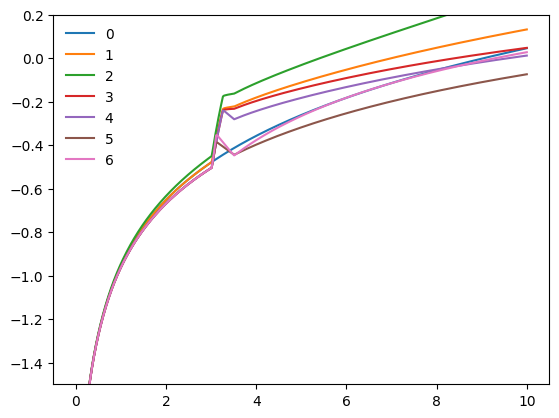

In [85]:
for model in stars.keys():
    plt.plot(stars[model][:,0], np.log10(stars[model][:,4]/0.0127), label=str(model))
plt.legend(frameon=False)
plt.ylim(-1.5, 0.2)

In [81]:
def get_logFeH_logMgFe(stars):
    GFM_SOLAR_ABUNDANCE_HYDROGEN = 0.7388
    GFM_SOLAR_ABUNDANCE_MAGNESIUM = 0.0007
    GFM_SOLAR_ABUNDANCE_IRON   =   0.0013
    
    FeH = stars[:,5+8] / GFM_SOLAR_ABUNDANCE_IRON
    logFeH = np.log10(FeH)

    MgH = stars[:,5+6] / GFM_SOLAR_ABUNDANCE_MAGNESIUM
    MgFe = MgH/FeH
    logMgH = np.log10(MgH)
    logMgFe = np.log10(MgFe)
    
    return logFeH, logMgH, logMgFe

In [86]:
logFeH, logMgH, logMgFe = {}, {} , {}
for model in stars.keys():
    logFeH[model], logMgH[model], logMgFe[model] = get_logFeH_logMgFe(stars[model])

(0.25, 0.65)

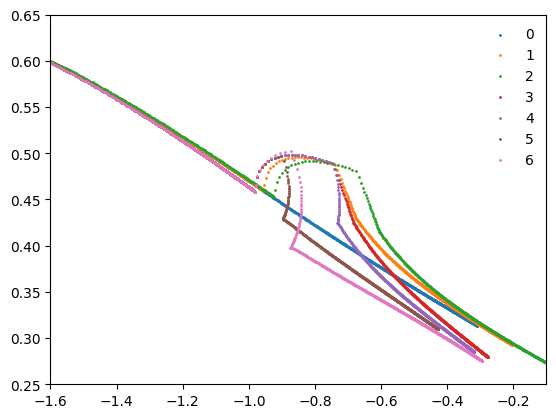

In [87]:
for model in stars.keys():
    plt.scatter(logFeH[model], logMgFe[model], s=1, label=str(model))

plt.legend(frameon=False)
# k = np.where(stars[:,0] == 3.0)[0]
# plt.scatter(logFeH[k], logMgFe[k])

plt.xlim(-0.9 - 0.7, 0.6 - 0.7)
plt.ylim(0.05 + 0.2, 0.45 + 0.2)

(0.02, 0.4)


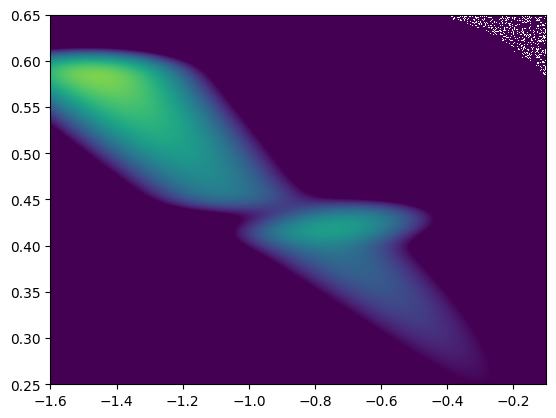

In [107]:
model = 6
x_grid = np.linspace(-0.9-0.7, 0.6-0.7, 500)
y_grid = np.linspace(0.05+0.2, 0.45+0.2, 500)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)

smoothed_values = np.zeros(x_mesh.shape)
weights = stars[model][:,2]

sigma = 0.04
for point_x, point_y, weight in zip(logFeH[model], logMgFe[model], weights):
    distance = np.sqrt((x_mesh - point_x)**2 + (y_mesh - point_y)**2)
    smoothed_values += weight * np.exp(-distance**2 / (2.0 * sigma**2))

vmin = 2e-2
vmax = 0.4
fig, ax = plt.subplots(1, 1)
im = ax.imshow(smoothed_values.T, origin='lower', extent=[x_grid[0], x_grid[-1], y_grid[0], y_grid[-1]],
              norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax))
ax.set_aspect('auto')
print(im.get_clim())

In [111]:
model = 6
kernel = stats.gaussian_kde(np.vstack([logFeH[model], logMgH[model]]))

In [121]:
x_grid = np.linspace(-0.9-0.7, 0.6-0.7, 500)
y_grid = np.linspace(0.05+0.2, 0.45+0.2, 500)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)
positions = np.vstack([x_mesh.ravel(), y_mesh.ravel()])
val = kernel(positions)

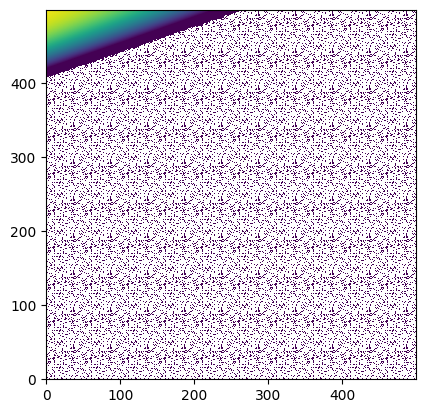

In [123]:
plt.imshow(val.reshape((500, 500)).T, origin='lower', norm=mpl.colors.LogNorm())